## Exploratory Data Analysis

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

In [0]:
!python data_clean.py

In [6]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.shape,test_df.shape

((6019, 13), (1234, 12))

{'Mumbai': 790, 'Hyderabad': 742, 'Kochi': 651, 'Coimbatore': 636, 'Pune': 622, 'Delhi': 554, 'Kolkata': 535, 'Chennai': 494, 'Jaipur': 413, 'Bangalore': 358, 'Ahmedabad': 224}


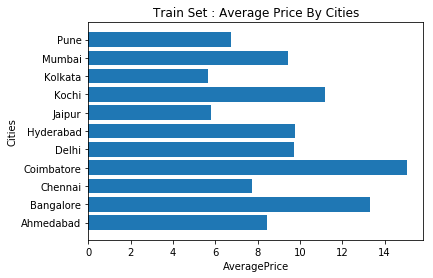

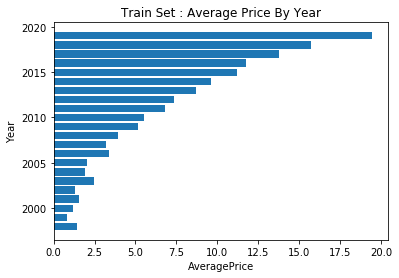

In [7]:
uniqueCities=dict(train_df['Location'].value_counts())

print(uniqueCities)

avgPriceAccToLocation=dict(train_df.groupby('Location')['Price'].mean())
plt.barh(list(avgPriceAccToLocation.keys()),list(avgPriceAccToLocation.values()))
plt.xlabel('AveragePrice')
plt.ylabel('Cities')
plt.title('Train Set : Average Price By Cities')
plt.show()

avgPriceAccToYear=dict(train_df.groupby('Year')['Price'].mean())
plt.barh(list(avgPriceAccToYear.keys()),list(avgPriceAccToYear.values()))
plt.xlabel('AveragePrice')
plt.ylabel('Year')
plt.title('Train Set : Average Price By Year')
plt.show()

In [8]:
train_df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [0]:
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)
test_df.drop(['Unnamed: 0'],axis=1,inplace=True)

**No. of Rows for each City**

In [10]:
train_df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

**No. of Rows for each Brand**

Text(0, 0.5, 'Brand')

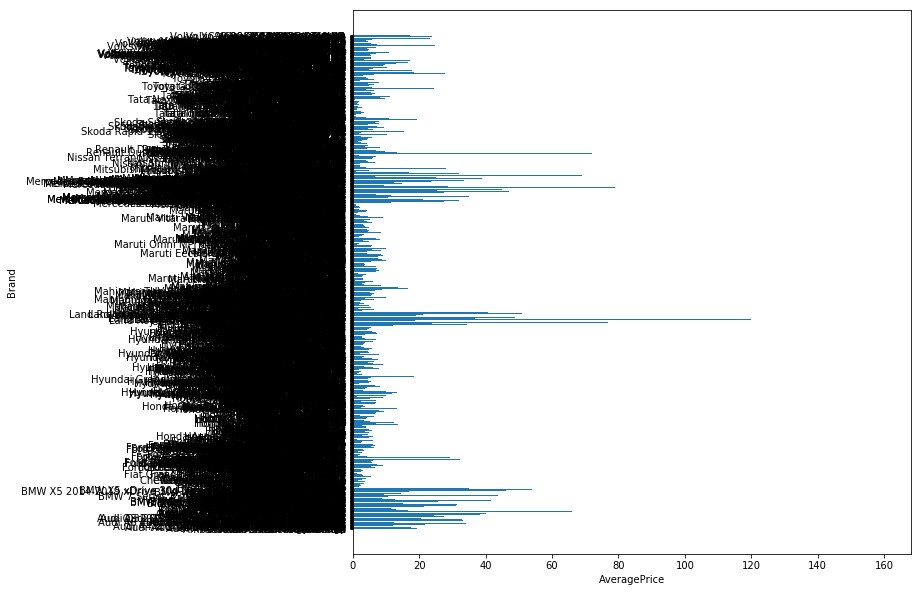

In [11]:
plt.figure(figsize=(10,10))
avgPriceAccToBrand=dict(train_df.groupby('Name')['Price'].mean())
plt.barh(list(avgPriceAccToBrand.keys()),list(avgPriceAccToBrand.values()))
plt.xlabel('AveragePrice')
plt.ylabel('Brand')

In [12]:
len(train_df['Name'].value_counts())  #1876 unqiue values.  high cardinality

1876

In [13]:
len(train_df['Year'].value_counts())  #22 unqiue values.  high cardinality

22

In [14]:
means_name = train_df.groupby('Name')['Price'].mean().to_dict()
count=0
for model, mean_enc in means_name.items(): 
    print(model, ":", mean_enc)
    count=count+1
    if(count==5):
      break

Ambassador Classic Nova Diesel : 1.35
Audi A3 35 TDI Attraction : 16.5
Audi A3 35 TDI Premium : 19.25
Audi A3 35 TDI Premium Plus : 18.9
Audi A3 35 TDI Technology : 22.5


In [15]:
means_location = train_df.groupby('Location')['Price'].mean().to_dict()
count=0
for loc, mean_enc in means_location.items(): 
    print(loc, ":", mean_enc)
    count=count+1
    if(count==5):
      break

Ahmedabad : 8.457321428571433
Bangalore : 13.32863128491619
Chennai : 7.753623481781378
Coimbatore : 15.078223270440263
Delhi : 9.707725631768943


In [16]:
means_year=train_df.groupby('Year')['Price'].mean().to_dict()
count=0
for year, mean_enc in means_year.items(): 
    print(year, ":", mean_enc)
    count=count+1
    if(count==5):
      break

1998 : 1.4324999999999999
1999 : 0.835
2000 : 1.175
2001 : 1.5437500000000002
2002 : 1.2940000000000003


## Target Encoding

In [0]:
# Source: https://maxhalford.github.io/blog/target-encoding-done-the-right-way/
def calc_smooth_mean(df1, df2, cat_name, target, weight):
    # Compute the global mean
    mean = df1[target].mean()

    # Compute the number of values and the mean of each group
    agg = df1.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + weight * mean) / (counts + weight)

    # Replace each value by the according smoothed mean
    if df2 is None:
        return df1[cat_name].map(smooth)
    else:
        return df1[cat_name].map(smooth),df2[cat_name].map(smooth.to_dict())

In [0]:
WEIGHT = 10
train_df['Name_enc'],test_df['Name_enc'] = calc_smooth_mean(df1=train_df, df2=test_df, cat_name='Name', target='Price', weight=WEIGHT)
train_df['Loc_enc'],test_df['Loc_enc'] = calc_smooth_mean(df1=train_df, df2=test_df, cat_name='Location', target='Price', weight=WEIGHT)
train_df['Yr_enc'],test_df['Yr_enc'] = calc_smooth_mean(df1=train_df, df2=test_df, cat_name='Year', target='Price', weight=WEIGHT)

In [0]:
train_df.drop(['Name','Location','Year'],axis=1,inplace=True)
test_df.drop(['Name','Location','Year'],axis=1,inplace=True)

In [0]:
train_df['owner_enc'],test_df['owner_enc'] = calc_smooth_mean(df1=train_df, df2=test_df, cat_name='Owner_Type', target='Price', weight=WEIGHT)
train_df['trans_enc'],test_df['trans_enc'] = calc_smooth_mean(df1=train_df, df2=test_df, cat_name='Transmission', target='Price', weight=WEIGHT)

In [0]:
train_df.drop(['Transmission','Owner_Type'],axis=1,inplace=True)
test_df.drop(['Transmission','Owner_Type'],axis=1,inplace=True)

In [0]:
train_df['fuel_enc'],test_df['fuel_enc'] = calc_smooth_mean(df1=train_df, df2=test_df, cat_name='Fuel_Type', target='Price', weight=WEIGHT)

In [0]:
train_df.drop(['Fuel_Type'],axis=1,inplace=True)
test_df.drop(['Fuel_Type'],axis=1,inplace=True)

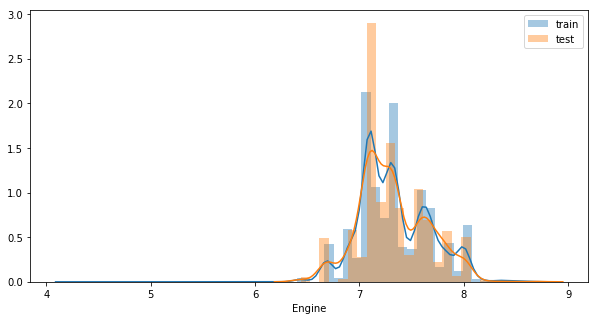

In [24]:
import numpy as np
plt.figure(figsize=(10,5))
sns.distplot(np.log(train_df['Engine']),label='train')
sns.distplot(np.log(test_df['Engine']),label='test')
plt.legend()

Train and test set have similar ditribution.

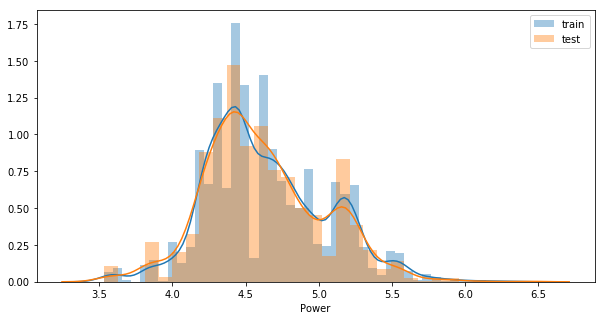

In [25]:
plt.figure(figsize=(10,5))
sns.distplot(np.log(train_df['Power']),label='train')
sns.distplot(np.log(test_df['Power']),label='test')
plt.legend()

In [0]:
#converting : log transform
train_df['Power']=np.log(train_df['Power'])
train_df['Engine']=np.log(train_df['Engine'])

In [0]:
#converting : log transform
test_df['Power']=np.log(test_df['Power'])
test_df['Engine']=np.log(test_df['Engine'])

In [28]:
train_df.shape,test_df.shape

((6019, 12), (1234, 11))

In [29]:
test_df.isnull().any()   
#this checks if any column have missing values or not which is highly likely given the test set contains car that are
#not present in train.  For these rows replacing them with 0 makes sense.

# Name_enc and Yr_enc contains missing values.

Kilometers_Driven    False
Mileage              False
Engine               False
Power                False
Seats                False
Name_enc              True
Loc_enc              False
Yr_enc                True
owner_enc            False
trans_enc            False
fuel_enc             False
dtype: bool

In [0]:
test_df['Name_enc']=test_df['Name_enc'].fillna(0.0)
test_df['Yr_enc']=test_df['Yr_enc'].fillna(0.0)

In [0]:
train_df.to_csv('final_train.csv')
test_df.to_csv('final_test.csv')

In [0]:
target=train_df['Price']
train_df.drop(['Price'],inplace=True,axis=1)

In [33]:
train_df.columns

Index(['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Name_enc',
       'Loc_enc', 'Yr_enc', 'owner_enc', 'trans_enc', 'fuel_enc'],
      dtype='object')

In [34]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
train_df.shape,test_df.shape

((6019, 13), (1234, 12))

In [0]:
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)
test_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [0]:
test_df['Name_enc'].fillna(test_df['Name_enc'].mean(),inplace=True)
test_df['Yr_enc'].fillna(test_df['Yr_enc'].mean(),inplace=True)

In [0]:
target=train_df['Price']
train_df.drop(['Price'],inplace=True,axis=1)

In [0]:
train_df=train_df.values

In [0]:
test_df=test_df.values

## Modelling
### Random Forest

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(50, 110, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer,mean_squared_error
rf=RandomForestRegressor(max_depth=110,n_estimators=400,min_samples_leaf=2,min_samples_split=2,max_features='auto')
kf=KFold(shuffle=True,random_state=123,n_splits=5)
splits=kf.split(train_df,target)
rmse_kf=[]
for trainIndex,valIndex in splits:
  X_train,X_val=train_df[trainIndex],train_df[valIndex]
  y_train,y_val=target[trainIndex],target[valIndex]
  rf.fit(X_train,y_train)
  preds=rf.predict(X_val)
  rmse_kf.append(mean_squared_error(y_val, preds))
  print("Split rmse: " + str(mean_squared_error(y_val, preds)))  

Split rmse: 8.105825093432504
Split rmse: 21.45291178981759
Split rmse: 8.448427684983082
Split rmse: 13.342331620730329
Split rmse: 11.001473689106348


In [0]:
np.array(rmse_kf).mean()   #mean mse for randomforest regressor after tuning

12.47019397561397

In [0]:
rf=RandomForestRegressor(max_depth=110,n_estimators=400,min_samples_leaf=2,min_samples_split=2,max_features='auto')
rf.fit(train_df,target)
preds_rf=rf.predict(test_df)

### XGboost

In [0]:
from xgboost import XGBRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
xgtrain = xgb.DMatrix(train_df, label=target.values)

#finding numof boosting rounds and learning rate
alg = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 seed=27)

xgb_param = alg.get_xgb_params()

cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=5,metrics='rmse', early_stopping_rounds=50)

In [0]:
n_estimators = cvresult.shape[0]

In [0]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=n_estimators, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, seed=27), 
 param_grid = param_test1, scoring=make_scorer(mean_squared_error),n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df,target)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 9, 'min_child_weight': 1}, 13.193760046385544)

In [0]:
param_test2b = {
 'max_depth':[13,15,16],  
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=n_estimators, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, seed=27), 
 param_grid = param_test2b, scoring=make_scorer(mean_squared_error),n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_df,target)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 13}, 13.539070192248479)

In [0]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=n_estimators, max_depth=13,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, seed=27), 
 param_grid = param_test3, scoring=make_scorer(mean_squared_error),n_jobs=4,iid=False, cv=5)
gsearch3.fit(train_df,target)
gsearch3.best_params_, gsearch3.best_score_

({'gamma': 0.1}, 13.703878477961421)

In [0]:
alg = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=13,
 min_child_weight=1,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:squarederror',
 seed=27)

xgb_param = alg.get_xgb_params()

cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=5,metrics='rmse', early_stopping_rounds=50)

In [0]:
n_estimators=cvresult.shape[0]

xgb_reg=XGBRegressor(max_depth=13,learning_rate=0.1,n_estimators=213,objective='reg:squarederror',gamma=0.1,min_child_weight=1,seed=123)
kf=KFold(shuffle=True,random_state=123,n_splits=5)
splits=kf.split(train_df,target)
rmse_kf=[]
for trainIndex,valIndex in splits:
  X_train,X_val=train_df[trainIndex],train_df[valIndex]
  y_train,y_val=target[trainIndex],target[valIndex]
  xgb_reg.fit(X_train,y_train)
  preds=xgb_reg.predict(X_val)
  rmse_kf.append(mean_squared_error(y_val, preds))
  print("Split mse: " + str(mean_squared_error(y_val, preds))) 

Split mse: 9.310190830582904
Split mse: 22.723361841009062
Split mse: 9.58929462713044
Split mse: 13.664674899885092
Split mse: 9.587979183812418


In [0]:
np.array(rmse_kf).mean()

12.975100276483982

We will tune the subsample and colsample_bytree parameters with values separated by 0.1 in first step

In [0]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=n_estimators, max_depth=13,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, seed=27), 
 param_grid = param_test4, scoring=make_scorer(mean_squared_error),n_jobs=4,iid=False, cv=5)
gsearch4.fit(train_df,target)
gsearch4.best_params_, gsearch4.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.9}, 14.021913846662377)

We will tune the subsample and colsample_bytree parameters with values separated by 0.05 in first step

In [0]:
param_test4b = {
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=n_estimators, max_depth=13,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, seed=27), 
 param_grid = param_test4b, scoring=make_scorer(mean_squared_error),n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_df,target)
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 0.95, 'subsample': 0.9}, 14.367898672389462)

In [0]:
param_test4b = {
 'colsample_bytree':[0.95,1]
}
gsearch5 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=n_estimators, max_depth=13,
 min_child_weight=1, gamma=0, subsample=0.9, colsample_bytree=0.8,
 objective= 'reg:squarederror', nthread=4, seed=27), 
 param_grid = param_test4b, scoring=make_scorer(mean_squared_error),n_jobs=4,iid=False, cv=5)
gsearch5.fit(train_df,target)
gsearch5.best_params_, gsearch5.best_score_

({'colsample_bytree': 1}, 14.60095288925397)

In [0]:
xgb_reg=XGBRegressor(max_depth=13,learning_rate=0.1,n_estimators=213,objective='reg:squarederror',gamma=0.1,min_child_weight=1,colsample_bytree=1,subsample=0.9,seed=123)
kf=KFold(shuffle=True,random_state=123,n_splits=5)
splits=kf.split(train_df,target)
rmse_kf=[]
for trainIndex,valIndex in splits:
  X_train,X_val=train_df[trainIndex],train_df[valIndex]
  y_train,y_val=target[trainIndex],target[valIndex]
  xgb_reg.fit(X_train,y_train)
  preds=xgb_reg.predict(X_val)
  rmse_kf.append(mean_squared_error(y_val, preds))
  print("Split mse: " + str(mean_squared_error(y_val, preds))) 

Split mse: 8.289705671432907
Split mse: 22.23121698445265
Split mse: 8.35179180525996
Split mse: 15.56560684475996
Split mse: 9.492606094269284


In [0]:
np.array(rmse_kf).mean()   #a slight reduction

12.786185480034954

In [0]:
param_test7 = {
 'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
gsearch6 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=n_estimators, max_depth=13,
 min_child_weight=1, gamma=0.1, subsample=0.9, colsample_bytree=1,
 objective= 'reg:squarederror', nthread=4, reg_alpha=0 , seed=27), 
 param_grid = param_test7, scoring=make_scorer(mean_squared_error),n_jobs=4,iid=False, cv=5)
gsearch6.fit(train_df,target)
gsearch6.best_params_, gsearch6.best_score_

({'reg_alpha': 0}, 14.720278028118372)

In [0]:
xgb_reg=XGBRegressor(max_depth=13,learning_rate=0.1,n_estimators=213,objective='reg:squarederror',gamma=0.1,min_child_weight=1,colsample_bytree=1,subsample=0.9,seed=123,reg_alpha=0)
kf=KFold(shuffle=True,random_state=123,n_splits=5)
splits=kf.split(train_df,target)
rmse_kf=[]
for trainIndex,valIndex in splits:
  X_train,X_val=train_df[trainIndex],train_df[valIndex]
  y_train,y_val=target[trainIndex],target[valIndex]
  xgb_reg.fit(X_train,y_train)
  preds=xgb_reg.predict(X_val)
  rmse_kf.append(mean_squared_error(y_val, preds))
  print("Split mse: " + str(mean_squared_error(y_val, preds))) 
np.array(rmse_kf).mean()   #a slight reduction  

Split mse: 8.289705671432907
Split mse: 22.23121698445265
Split mse: 8.35179180525996
Split mse: 15.56560684475996
Split mse: 9.492606094269284


12.786185480034954

In [0]:
xgb_reg=XGBRegressor(max_depth=13,learning_rate=0.1,n_estimators=213,objective='reg:squarederror',gamma=0.1,min_child_weight=1,colsample_bytree=1,subsample=0.9,seed=123,reg_alpha=0)
xgb_reg.fit(train_df,target)
preds_xgb=xgb_reg.predict(test_df)

In [0]:
preds_rf[:5]

array([ 3.34405004,  3.07141296, 17.73206411,  4.0449367 ,  4.46441165])

In [0]:
preds_xgb[:5]

array([ 3.4443724,  3.0317767, 17.987188 ,  4.402149 ,  4.4060755],
      dtype=float32)

In [0]:
submit=pd.read_excel('0.77.xlsx')

In [0]:
submit['Price']=(preds_xgb+preds_rf)/2

In [0]:
submit.to_csv('rf+xgb.csv')

### LightGBM

In [0]:
import lightgbm as lgb

In [0]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'max_depth': 6, 
    'learning_rate': 0.1,
    'verbose': 0, 
    'early_stopping_round': 50}
n_estimators = 1000

lgb_train=lgb.Dataset(train_df,label=target)
cvresult=lgb.cv(params,lgb_train,num_boost_round=n_estimators,nfold=5,stratified=False,seed=123)

In [0]:
len(cvresult['l2-mean'])  

305

In [0]:
n_estimators=305

In [0]:
param_test1 = {
 'max_depth':range(3,10,2),
}

lgb_reg=lgb.LGBMRegressor(objective='regression',learning_rate=0.1,n_estimators=n_estimators,max_depth=8,metric='mse')
gsearch1 = GridSearchCV(param_grid=param_test1,estimator = lgb_reg,n_jobs=4,iid=False, cv=5)
gsearch1.fit(train_df,target)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 7}, 0.9047489453458167)

In [0]:
param_test2 = {
 'num_leaves':[70,80,90,100]
}
lgb_reg=lgb.LGBMRegressor(objective='regression',learning_rate=0.1,n_estimators=n_estimators,max_depth=7,metric='mse',num_leaves=31)
gsearch2 = GridSearchCV(param_grid=param_test2,estimator = lgb_reg,n_jobs=4,iid=False, cv=5)
gsearch2.fit(train_df,target)
gsearch2.best_params_, gsearch2.best_score_

({'num_leaves': 70}, 0.9024262916374275)

In [0]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mse',
    'max_depth': 7,
    'num_leaves':70,
    'learning_rate': 0.1,
    'verbose': 0, 
    'early_stopping_round': 50}
n_estimators = 1000

lgb_train=lgb.Dataset(train_df,label=target)
cvresult=lgb.cv(params,lgb_train,num_boost_round=n_estimators,nfold=5,stratified=False,seed=123)

In [0]:
n_estimators=len(cvresult['l2-mean'])

In [0]:
lgb_reg=lgb.LGBMRegressor(boosting_type='gbdt',objective='regression',learning_rate=0.1,n_estimators=n_estimators,max_depth=7,metric='mse',num_leaves=70)
kf=KFold(shuffle=True,random_state=123,n_splits=5)
splits=kf.split(train_df,target)
rmse_kf=[]
for trainIndex,valIndex in splits:
  X_train,X_val=train_df[trainIndex],train_df[valIndex]
  y_train,y_val=target[trainIndex],target[valIndex]
  lgb_reg.fit(X_train,y_train)
  preds=lgb_reg.predict(X_val)
  rmse_kf.append(mean_squared_error(y_val, preds))
  print("Split mse: " + str(mean_squared_error(y_val, preds))) 
np.array(rmse_kf).mean()   #a slight reduction  

Split mse: 8.081414692059075
Split mse: 16.289148831361942
Split mse: 7.801964684890716
Split mse: 13.195371529819221
Split mse: 10.155458551273023


11.104671657880795

In [0]:
lgb_reg=lgb.LGBMRegressor(boosting_type='gbdt',objective='regression',learning_rate=0.1,n_estimators=n_estimators,max_depth=7,metric='mse',num_leaves=70)
lgb_reg.fit(train_df,target)
preds_lgb=lgb_reg.predict(test_df)

In [0]:
train_df.shape

(6014, 11)

### Artificial Neural Network

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(train_df)
X_test = sc.transform(test_df)

# Evaluating, Improving and Tuning the ANN

# Evaluating the ANN
from sklearn.model_selection import cross_val_score
from tensorflow.contrib.keras.api.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.contrib.keras.api.keras.models import Sequential
from tensorflow.contrib.keras.api.keras.layers import Dense, Dropout
from tensorflow.contrib.keras import backend

def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
    regressor.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
    regressor.compile(optimizer='adam', loss='mean_squared_error')
    return regressor


regressor = KerasRegressor(build_fn=build_regressor, batch_size=10, epochs=10)
# cv = 10 is the usual number used for cross validation (it runs 10 different experiments)
accuracies = cross_val_score(estimator=regressor, X=X_train, y=target, cv=10, n_jobs=1,scoring=make_scorer(mean_squared_error))
mean = accuracies.mean()
variance = accuracies.std()


W0718 13:57:00.717719 140171146680192 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
5412/5412 [==============================] - 5s 859us/sample - loss: 125.2363
Epoch 2/10
5412/5412 [==============================] - 1s 216us/sample - loss: 30.5360
Epoch 3/10
5412/5412 [==============================] - 1s 213us/sample - loss: 27.3453
Epoch 4/10
5412/5412 [==============================] - 1s 218us/sample - loss: 25.6895
Epoch 5/10
5412/5412 [==============================] - 1s 213us/sample - loss: 24.8516
Epoch 6/10
5412/5412 [==============================] - 1s 220us/sample - loss: 24.1668
Epoch 7/10
5412/5412 [==============================] - 1s 220us/sample - loss: 23.5487
Epoch 8/10
5412/5412 [==============================] - 1s 215us/sample - loss: 23.0381
Epoch 9/10
5412/5412 [==============================] - 1s 213us/sample - loss: 22.5383
Epoch 10/10
5412/5412 [==============================] - 1s 213us/sample - loss: 22.1318
Epoch 1/10
5412/5412 [==============================] - 1s 246us/sample - loss: 122.7402
Epoch 2/10
5412/5412 [=======

In [0]:
# Tuning the ANN
def build_regressor(optimizer):
    regressor = Sequential()
    regressor.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=11))
    # Improving the ANN
    # Dropout Regularization to reduce overfitting if needed
    regressor.add(Dropout(0.1))
    regressor.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
    regressor.add(Dense(units=1, kernel_initializer='uniform', activation='linear'))
    regressor.compile(optimizer=optimizer, loss='mean_squared_error')
    return regressor


regressor = KerasClassifier(build_fn=build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [10, 50],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator=regressor,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10)
grid_search = grid_search.fit(X_train, target)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
backend.clear_session()